In [ ]:
# Danika Mariam (1004014880)
# INF2178: Assignment 4

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
from google.colab import drive, files
drive.mount("/drive", force_remount=True)
df = pd.read_csv("/drive/MyDrive/INF2178_A4_data.csv")

# Display the first few rows of the dataset
print(df.head())

# Check the structure and data types of the dataset
print(df.info())

# Summary statistics
print(df.describe())

Mounted at /drive
   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   

  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883  
1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876  
2    R   75    12  NaN  23.0  0.5  1678  0.736  1.046  
3    R   76    12  NaN  28.0  0.5  1738  0.713  1.010  
4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----

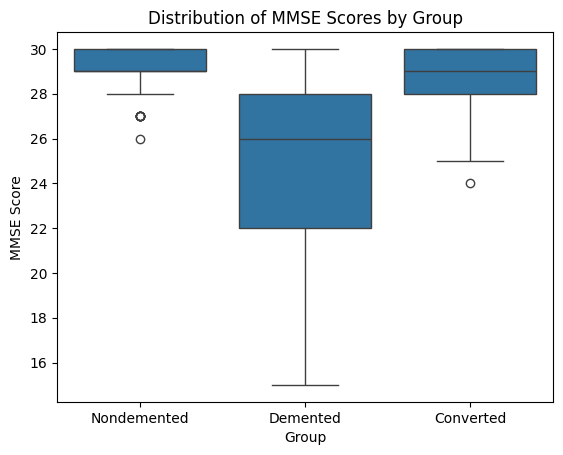

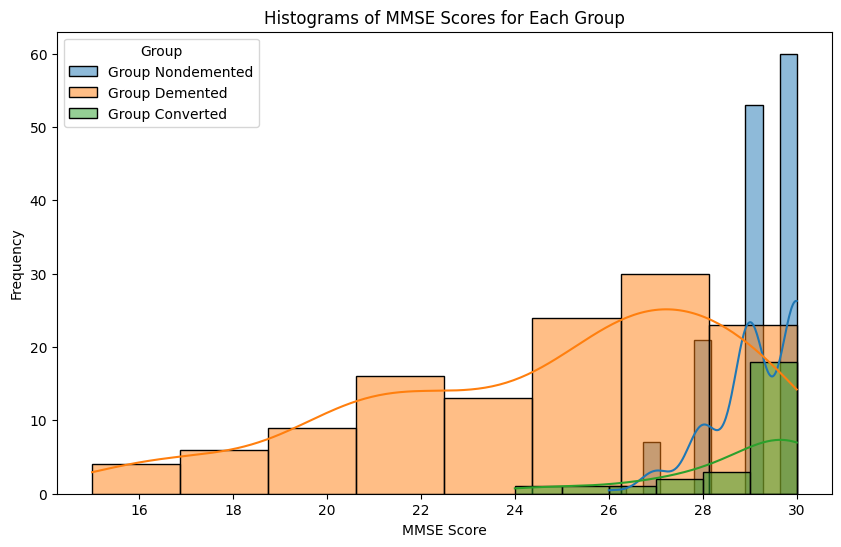

                    W          pval  normal
Group                                      
Nondemented  0.809528  2.635762e-12   False
Demented     0.929083  5.677786e-06   False
Converted    0.770938  5.867723e-05   False


In [ ]:
#!pip install pingouin
import pingouin as pg

# Exploratory Data Analysis (EDA)
# Visualize the distribution of MMSE scores by Group
sns.boxplot(x='Group', y='MMSE', data=df)
plt.title('Distribution of MMSE Scores by Group')
plt.xlabel('Group')
plt.ylabel('MMSE Score')
plt.show()

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['MMSE'], kde=True, color='blue', bins=20)
plt.title('Histogram of MMSE Scores')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()

# Test for normality
normality_test = pg.normality(data=df, dv='MMSE', group='Group')
print(normality_test)


In [ ]:
# Perform mixed-effects ANOVA
# Perform mixed-effects ANOVA
mixed_anova_result = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)

# Print ANOVA summary
print(mixed_anova_result)

# Post hoc tests if necessary
posthoc_tests = pg.pairwise_tests(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
print(posthoc_tests)

        Source           SS  DF1  DF2          MS          F         p-unc  \
0        Group  1328.421218    2  140  664.210609  56.212233  1.201604e-18   
1        Visit    22.377622    1  140   22.377622   8.859368  3.436529e-03   
2  Interaction    17.000403    2  140    8.500201   3.365255  3.737081e-02   

        np2  eps  
0  0.445379  NaN  
1  0.059515  1.0  
2  0.045870  NaN  
        Contrast Visit          A            B Paired  Parametric         T  \
0          Visit     -          1            2   True        True  2.928096   
1          Group     -  Converted     Demented  False        True  6.738993   
2          Group     -  Converted  Nondemented  False        True -1.302773   
3          Group     -   Demented  Nondemented  False        True -9.448737   
4  Visit * Group     1  Converted     Demented  False        True  8.011725   
5  Visit * Group     1  Converted  Nondemented  False        True  0.488598   
6  Visit * Group     1   Demented  Nondemented  False     

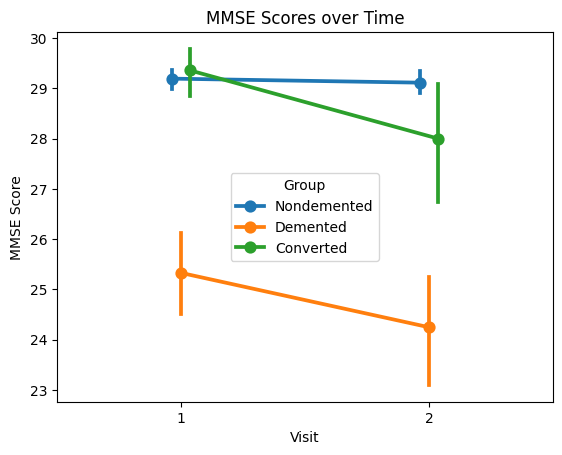

In [ ]:
# Plot MMSE scores over time
sns.pointplot(data=df, x='Visit', y='MMSE', hue='Group', dodge=True)
plt.title('MMSE Scores over Time')
plt.xlabel('Visit')
plt.ylabel('MMSE Score')
plt.show()


In [ ]:
from statsmodels.stats.power import TTestIndPower

# Perform power analysis for t-tests
alpha = 0.05
power = 0.91
effect_size = 0.7
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Appropriate sample size for the theoretical experiment:", sample_size)


Appropriate sample size for the theoretical experiment: 45.45073088568012
